# PROBLEM STATEMENT

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import codecs

IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [2]:
a_df=pd.read_csv("C:/Users/AMEET/Desktop/Anuja/Data_Trained/FLIP_BOBO_Intership/Evaluation Projects/avocado FILE.csv")
a_df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
a_df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
a_df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [5]:
a_df.shape

(18249, 14)

In [6]:
a_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
a_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
a_df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

### Statistical Analysis

###### Data Integrity Check

In [9]:
a_df.duplicated().sum()

0

This Dataset does not contain any Duplicate Entry.

##### Checking Missing Values

<Axes: >

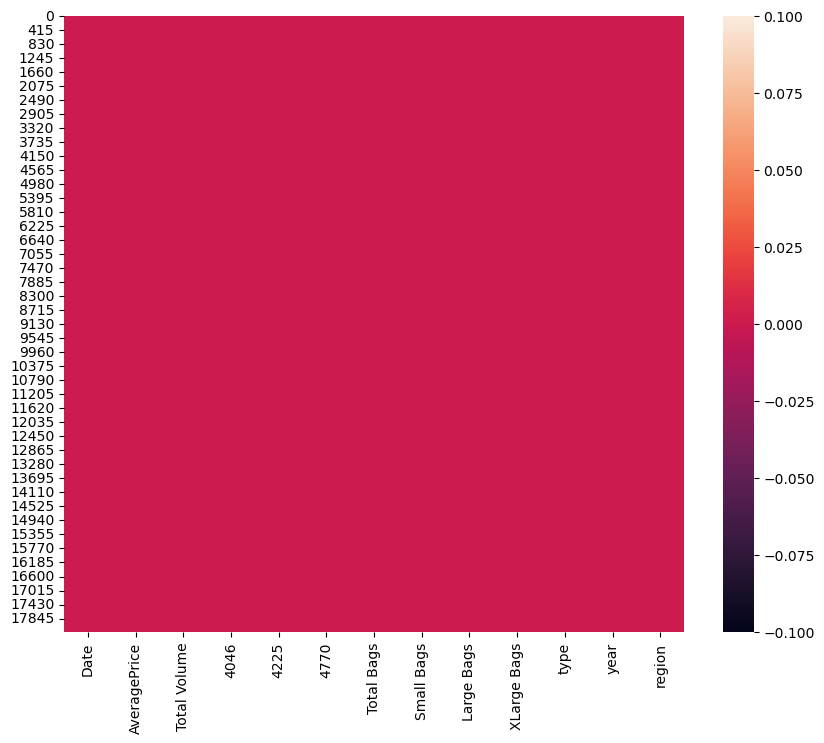

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(a_df.isnull())

In [11]:
a_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
a_df.isnull().sum().sum()

0

In [12]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- 13 Features in DataSet
- Region datatype is 'Object'
- Date datatype by default is 'Object', which we need to change to 'datetime' datatype.
- Other variables are 'float' and 'int'

#### Statistical Matrix

<Axes: >

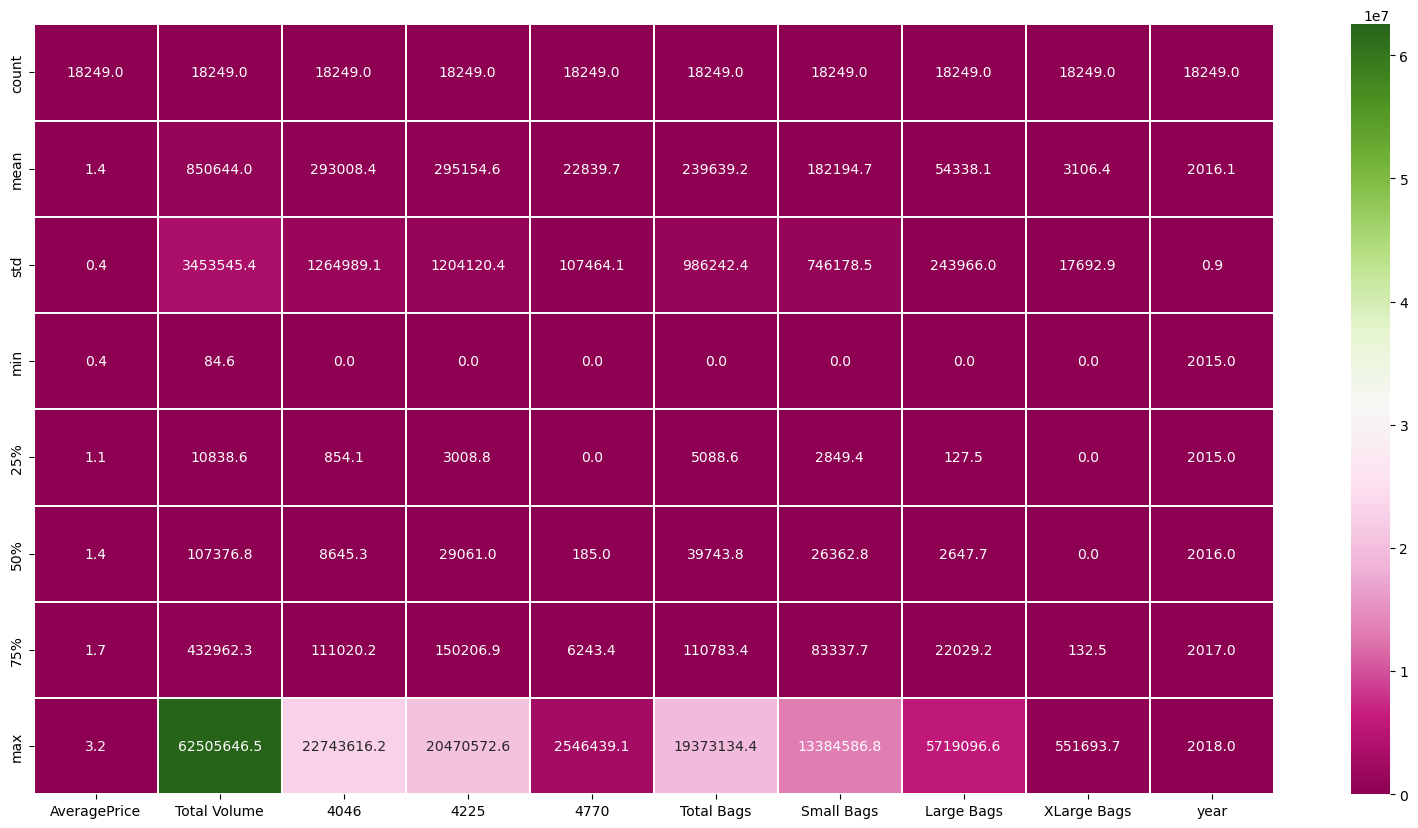

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(a_df.describe(),linewidths=0.1,fmt='0.1f',annot=True,cmap='PiYG')

In [14]:
a_df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

- We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
- For most of columns have minimum value of zero.
- Almost in all columns value of mean is greater than median. Data is right skewed.
- For most of columns value of std. deviation is greater than mean i.e. data is spread.

In [15]:
print('\033[1m'+'Minimum Price of Avacado :'+'\033[0m',a_df.AveragePrice.min(),'USD')
print('\033[1m'+'Minimum Price of Avacado :'+'\033[0m',a_df.AveragePrice.max(),'USD')
print('\033[1m'+'Minimum Price of Avacado :'+'\033[0m',a_df.AveragePrice.mean(),'USD')

Minimum Price of Avacado : 0.44 USD
Minimum Price of Avacado : 3.25 USD
Minimum Price of Avacado : 1.405978409775878 USD


Avacado varies from 0.44 USD to 3.25 USD with average price of 1.40 USD per unit

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

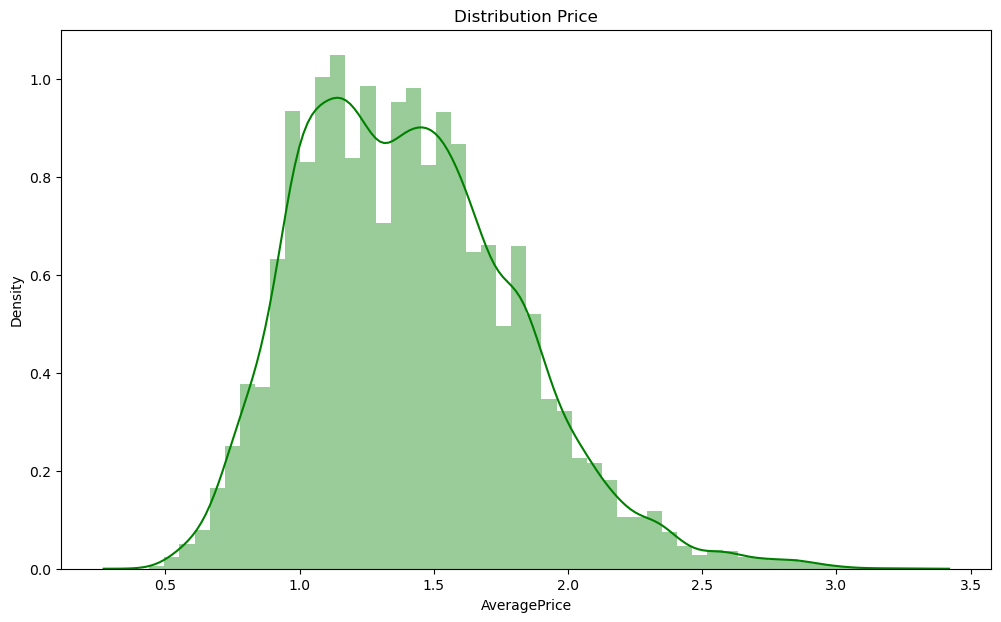

In [16]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(a_df['AveragePrice'],color='g')

- Most of the cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [17]:
a_df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [18]:
a_df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [19]:
print('033[1m'+'Percentage difference in price of Avacado :' + '\033[0m',((1.65399-1.158040)/1.158040)*100,'%')

033Percentage difference in price of Avacado : 42.826672653794354 %


<Axes: xlabel='AveragePrice', ylabel='type'>

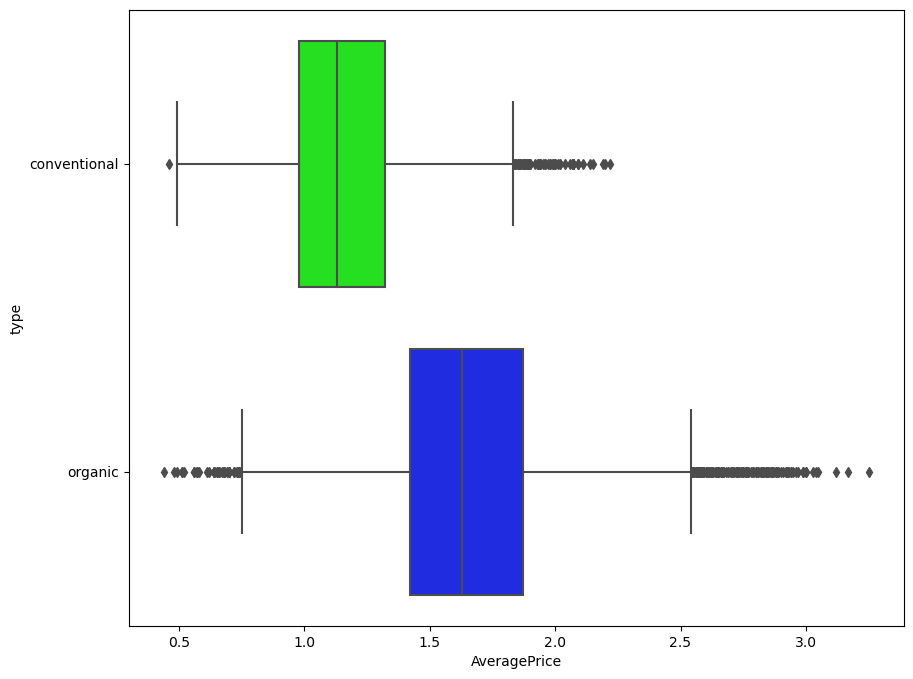

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y='type',x='AveragePrice', data=a_df, palette = 'hsv')

- Organic Avacado is almost 43% more costiler than conventional Avacado.

###### Check over volumetric sell of Avacado

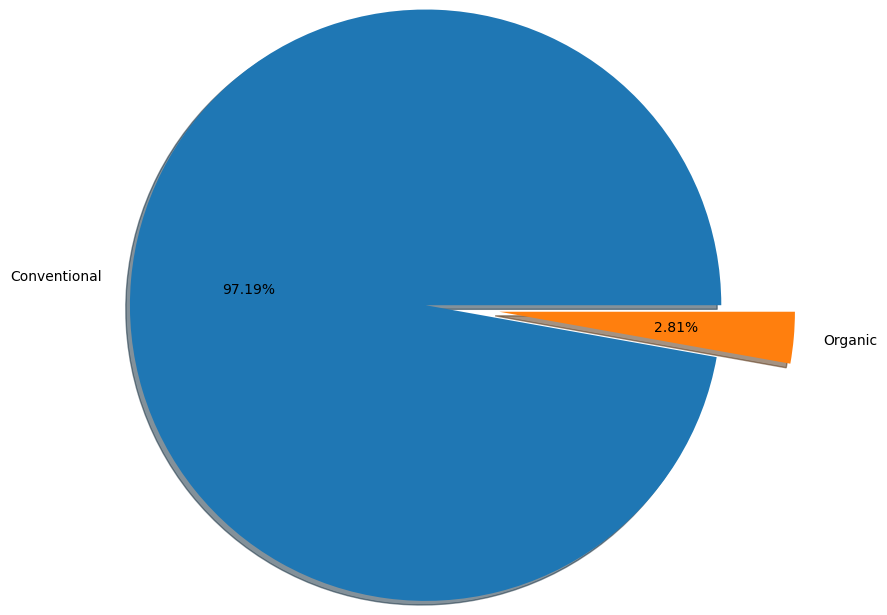

In [21]:
labels='Conventional', 'Organic',
fig, ax = plt.subplots()
ax.pie(a_df.groupby('type')['Total Volume'].mean(),labels = labels,radius=2,autopct = '%2.2f%%',explode=[0.3,0.2],shadow = True)
plt.show()

In [23]:
a_df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

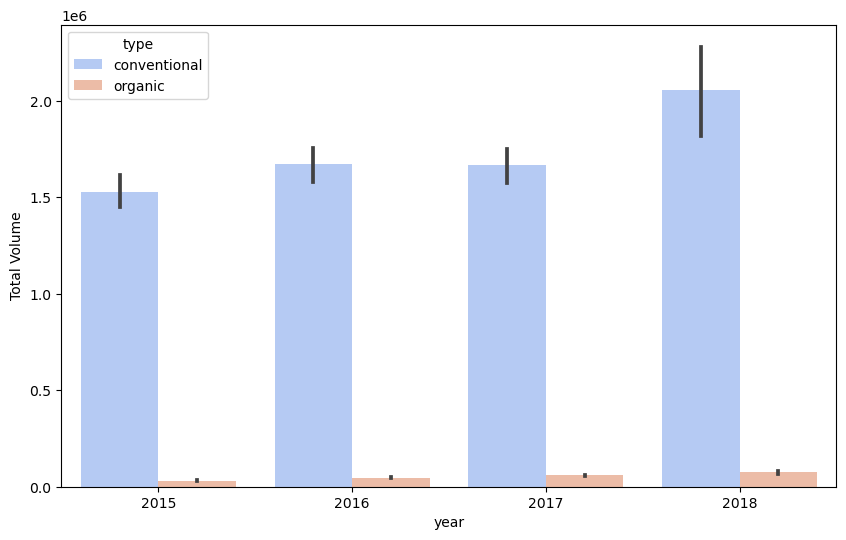

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue='type',data=a_df,palette='coolwarm',ci=68)
plt.show()

- The sell of organic avacado is less than 3%.
- Conventional Avacado are in more demand.

In [24]:
pd.crosstab([a_df.type,a_df.year],a_df.AveragePrice,margins=True).style.background_gradient(cmap='summer_r')

In [26]:
a_df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

- Organic Avocado is 40-50% costlier than convenctional avocado.
- Except 2017 each year their is increase in price of avocado.

###### Cheking the Trend of demand through volume sell

In [27]:
a_df.groupby(['year','type'])[['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

- Sales of Avocado in 2017 is more than 2016, so price hike is may be as result of increase in demand or some supply chain issue.
- XLarge Bags sales increase rapidly in 2017 compare to 2015

In [28]:
a_df.sort_values(by=['Date'],inplace=True, ascending=True)

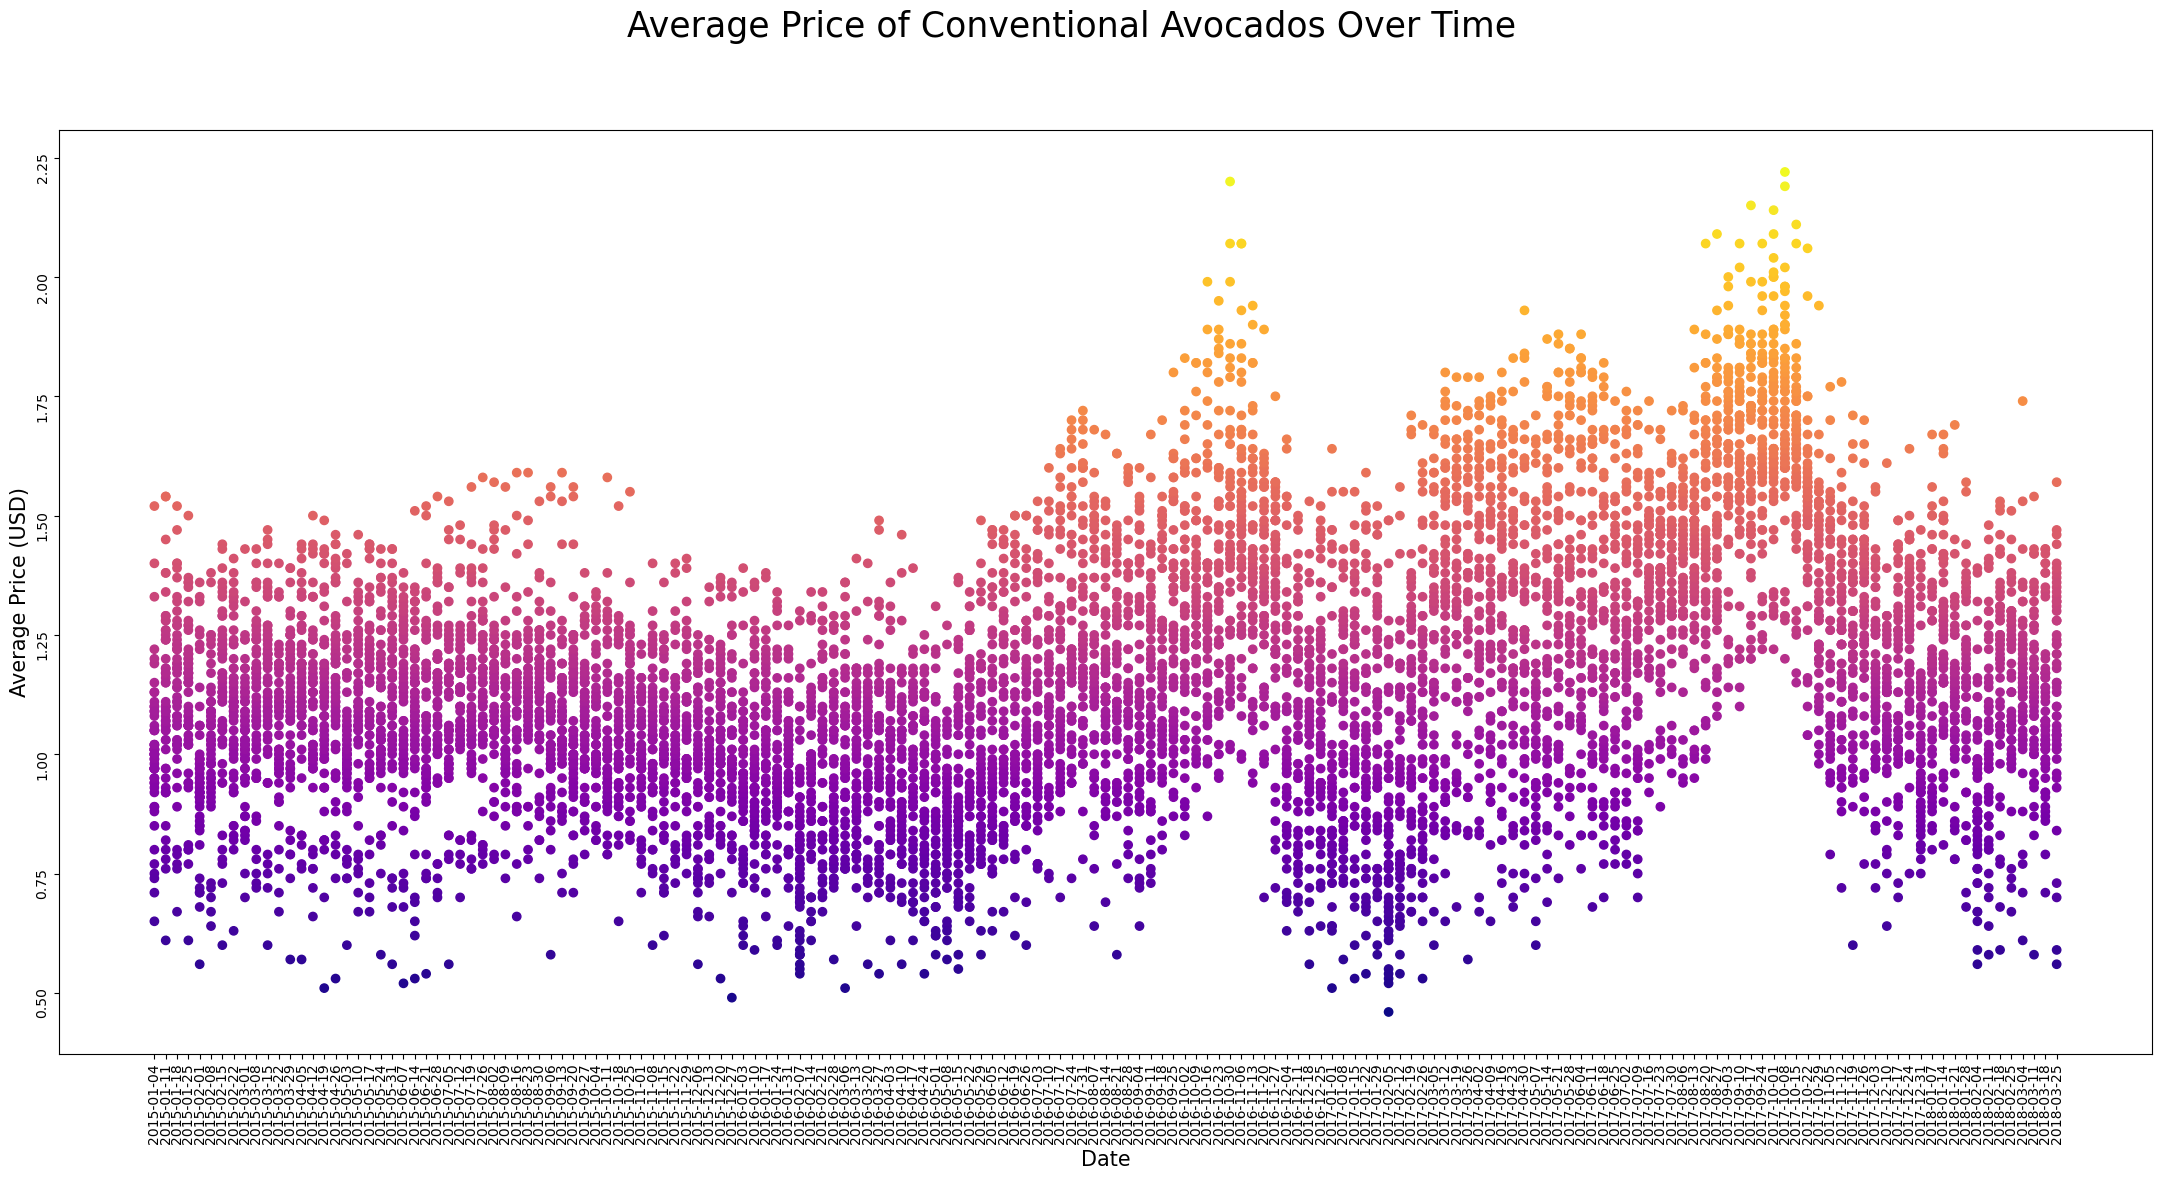

In [29]:
mask = a_df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = a_df[mask]['Date'].tolist()
avgPrices = a_df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

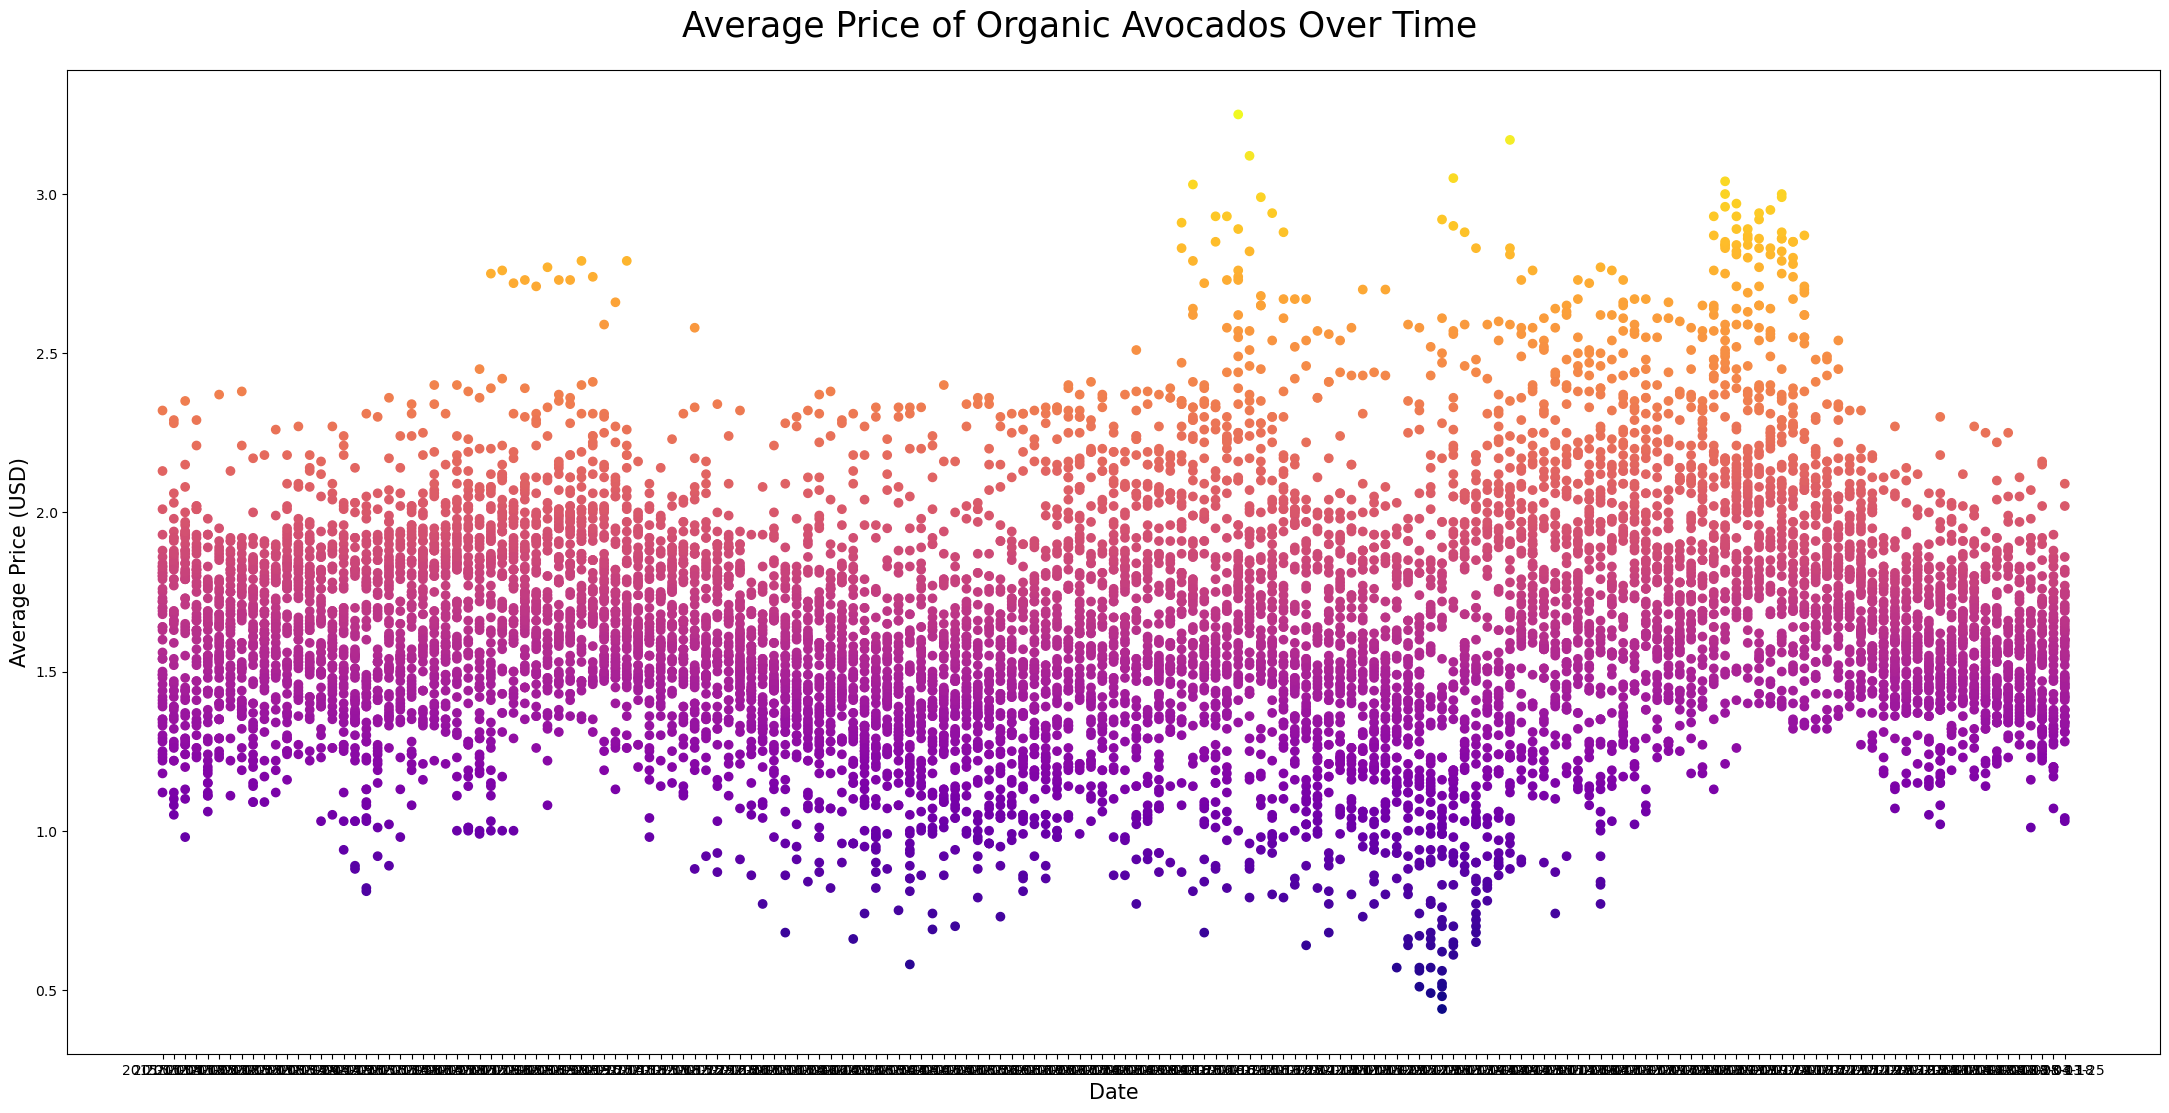

In [30]:
mask = a_df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = a_df[mask]['Date'].tolist()
avgPrices = a_df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()

plt.show()

In [31]:
a_df.groupby(a_df['region'])[['Total Volume','AveragePrice']].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

## EDA

In [32]:
a_df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569  2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593   2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009  2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819   2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333   2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

In [33]:
a_df2=a_df.copy()

In [34]:
a_df2.drop(['Date','type','region','year'],axis=1, inplace=True)

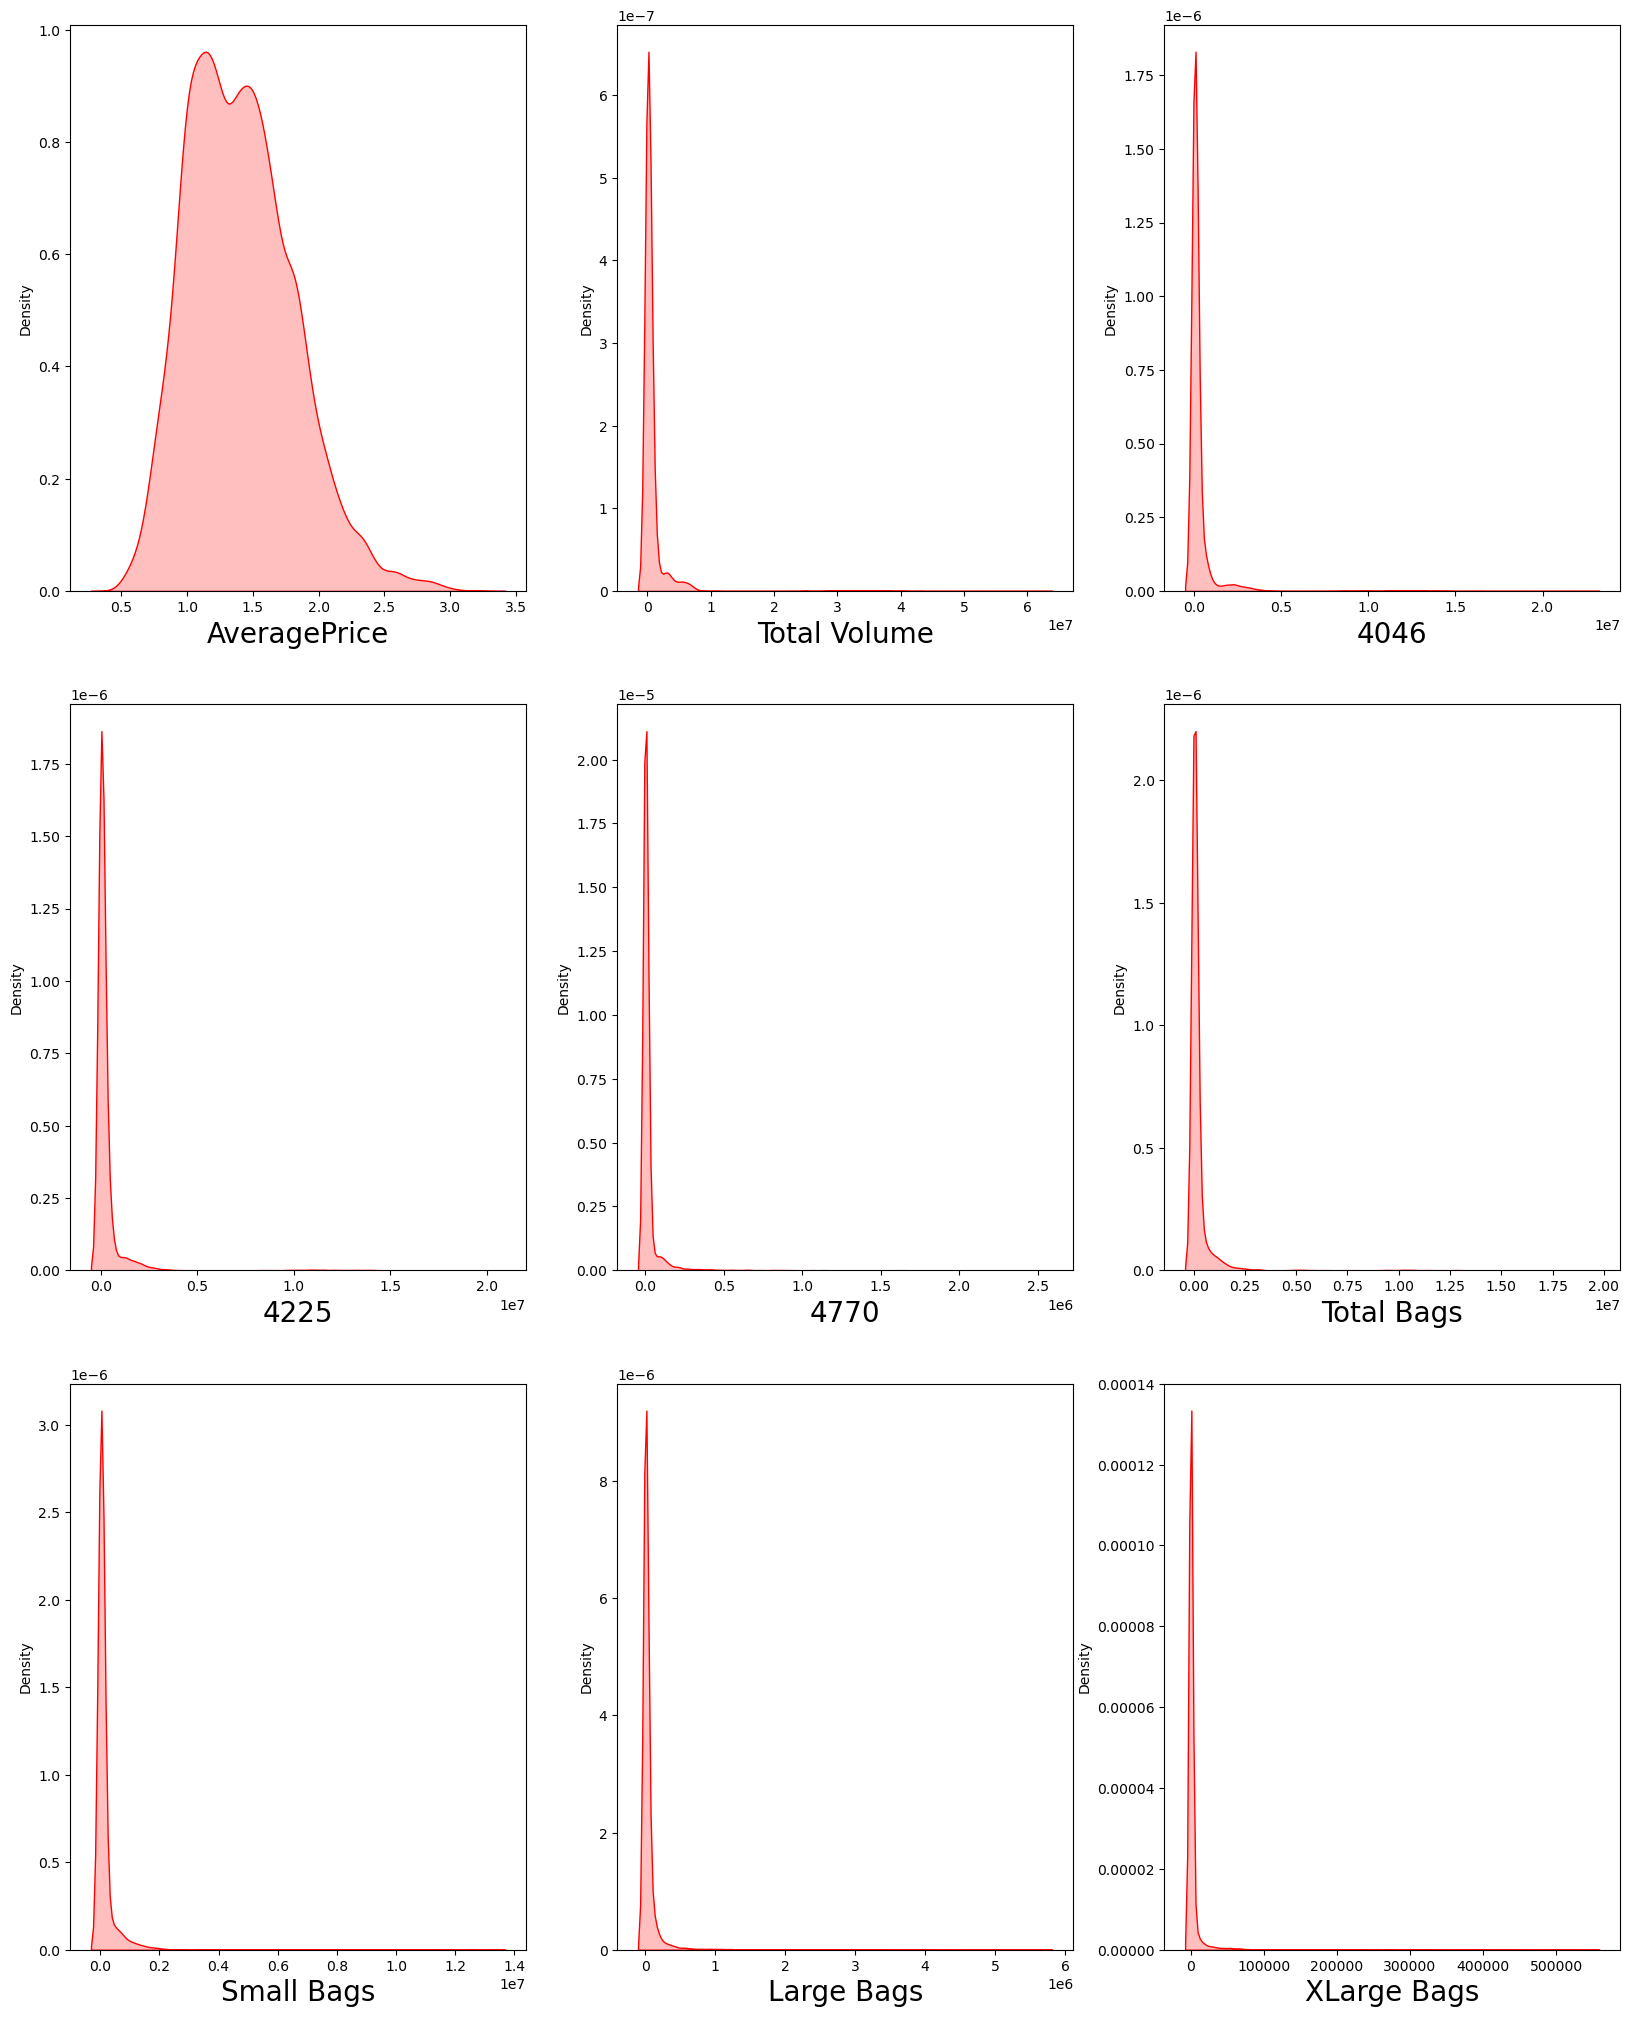

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in a_df2:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(a_df2[column],color='r',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We can see skewed data with presence of outliers with sharp peak.
- Most of the plots are right skewed, having value of mean very small compare to std.deviation & median. This is resulting in sharp high peak. Very few data points are present as we move away from zero to other end of x-axis.

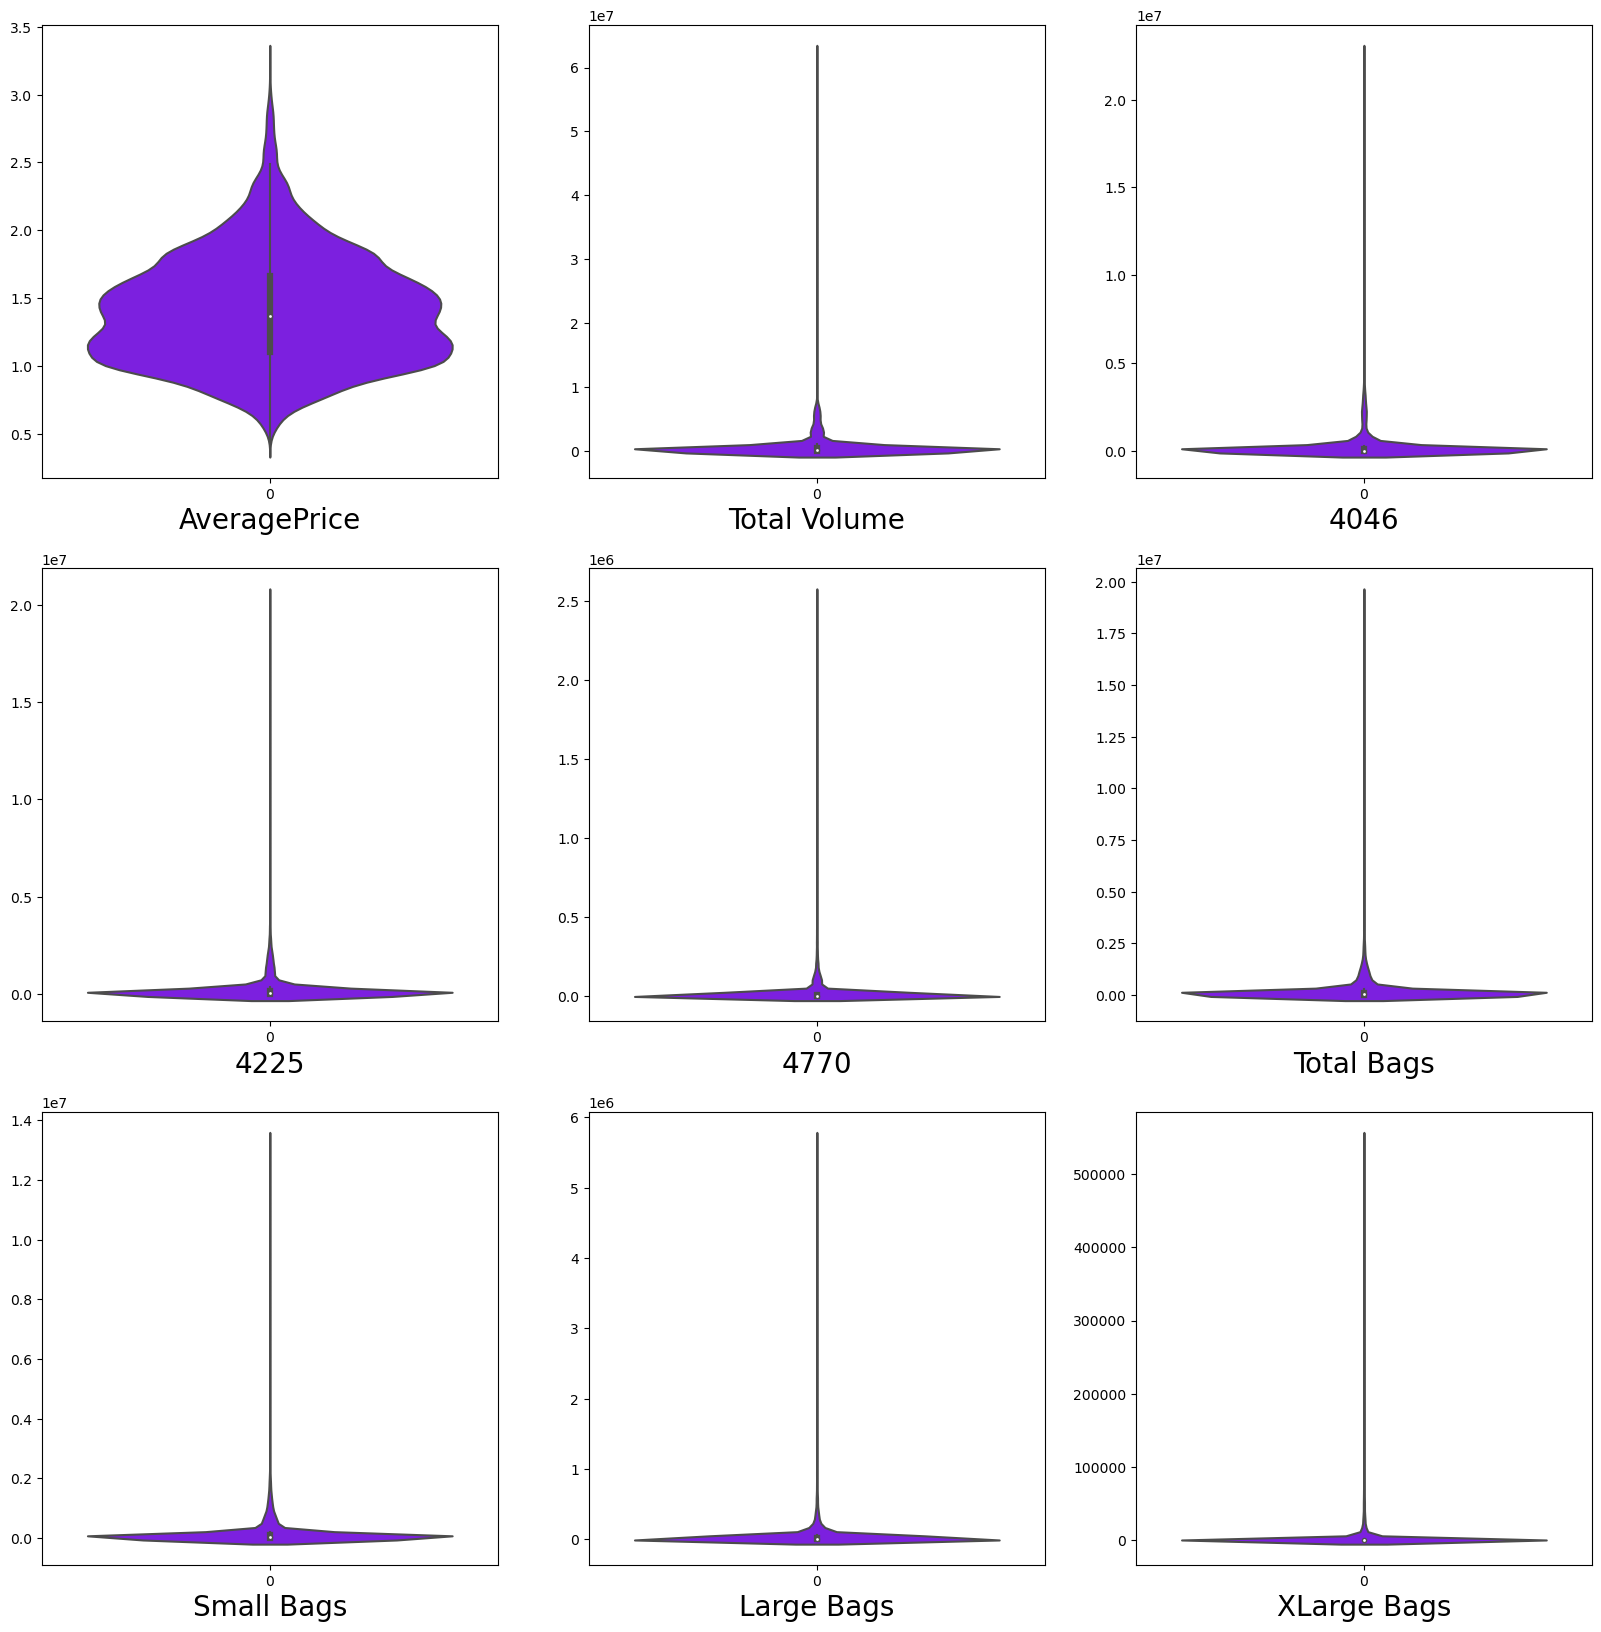

In [36]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in a_df2:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.violinplot(a_df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()
    

- For Majority Average price is in range of 1 to 1.5.

##### Variation Average price and Sales Volume over each month.

Spiliting of Data column into Tear, Month and Day.

In [37]:
a_df=pd.read_csv("C:/Users/AMEET/Desktop/Anuja/Data_Trained/FLIP_BOBO_Intership/Evaluation Projects/avocado FILE.csv")

In [38]:
a_df3=a_df.copy()

In [39]:
a_df3['Year']=a_df3['Date'].str.split('-').str

In [40]:
a_df3['Month']=a_df3['Date'].str.split('-').str

In [41]:
a_df3['Day']=a_df3['Date'].str.split('-').str

In [42]:
a_df3

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  \
0      2015            Albany   
1      2015            Albany   
2      2015            Albany   
3      2015            Albany   
4      2015            Albany   
...     ...               ...   
18244  2018  WestTexNewMexico   
18245  2018  WestTexNewMexico   
18246  2018  WestTexNewMexico   
18247  2018  WestTexNewMexico   
18248  2018  WestTexNewMexico   

                                                    Year  \
0      <pandas.core.strings.accessor.StringMethods ob...   
1      <pandas.core.strings.accessor.StringMethods ob...   
2      <pandas.core.strings.accessor.StringMethods ob...   
3      <pandas.core.strings.accessor.StringMethods ob...   
4      <pandas.core.strings.accessor.StringMethods ob...   
...                                                  ...   
18244  <pandas.core.strings.accessor.StringMethods ob...   
18245  <pandas.core.strings.accessor.StringMethods ob...   
18246  <pandas.core.strings.accessor.StringMethods ob...   
18247  <pandas.core.strings.accessor.StringMethods ob...   
18248  <pandas.core.strings.accessor.StringMethods ob...   

                                                   Month  \
0      <pandas.core.strings.accessor.StringMethods ob...   
1      <pandas.core.strings.accessor.StringMethods ob...   
2      <pandas.core.strings.accessor.StringMethods ob...   
3      <pandas.core.strings.accessor.StringMethods ob...   
4      <pandas.core.strings.accessor.StringMethods ob...   
...                                                  ...   
18244  <pandas.core.strings.accessor.StringMethods ob...   
18245  <pandas.core.strings.accessor.StringMethods ob...   
18246  <pandas.core.strings.accessor.StringMethods ob...   
18247  <pandas.core.strings.accessor.StringMethods ob...   
18248  <pandas.core.strings.accessor.StringMethods ob...   

                                                     Day  
0      <pandas.core.strings.accessor.StringMethods ob...  
1      <pandas.core.strings.accessor.StringMethods ob...  
2      <pandas.core.strings.accessor.StringMethods ob... 

In [44]:
a_df3['year']=a_df3['year'].astype(int)

In [48]:
a_df3.drop(columns=['Day'],axis=1, inplace=True)

In [49]:
a_df3.drop(columns=['Date'],axis=1, inplace=True)

In [50]:
a_df3.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region                                               Year  \
0  Albany  <pandas.core.strings.accessor.StringMethods ob...   
1  Albany  <pandas.core.strings.accessor.StringMethods ob...   
2  Albany  <pandas.core.strings.accessor.StringMethods ob...   
3  Albany  <pandas.core.strings.accessor.StringMethods ob...   
4  Albany  <pandas.core.strings.accessor.StringMethods ob...   

                                               Month  
0  <pandas.core.strings.accessor.StringMethods ob...  
1  <pandas.core.strings.accessor.StringMethods ob...  
2  <pandas.core.strings.accessor.StringMethods ob...  
3  <pandas.core.strings.accessor.StringMethods ob...  
4  <pandas.core.strings.accessor.StringMethods ob...

In [51]:
a_df3['Year'].value_counts()

Year
<pandas.core.strings.accessor.StringMethods object at 0x000002048EBDF110>    18249
Name: count, dtype: int64

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64


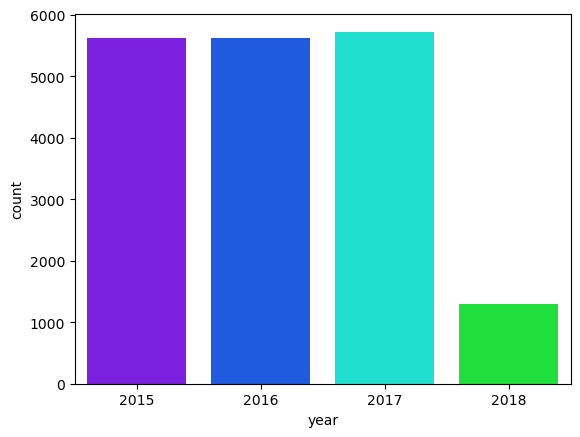

In [54]:
ax = sns.countplot(x = 'year', data = a_df)
print(a_df['year'].value_counts())

In [58]:
a_df3['Month'].value_counts().max()

18249

In [59]:
a_df3['Month'].value_counts().min()

18249

In [60]:
a_df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month <pandas.core.strings.accessor.StringMethods object at 0x000002048F204FD0>  \
type                                                               conventional   
mean                                             1.15804                          

Month            
type    organic  
mean   1.653999

<Figure size 1000x1000 with 0 Axes>

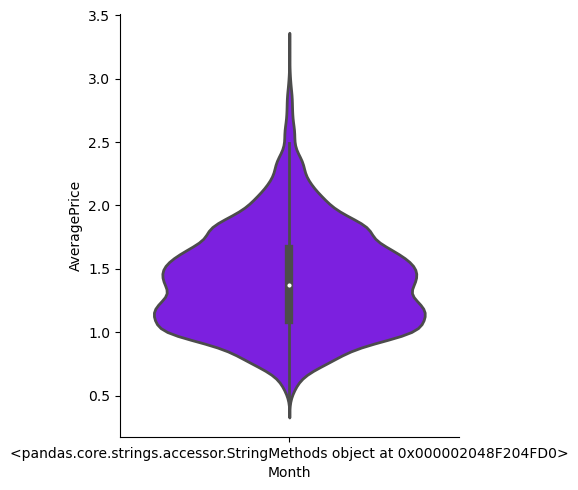

In [61]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=a_df3, linewidth=2)
plt.show()

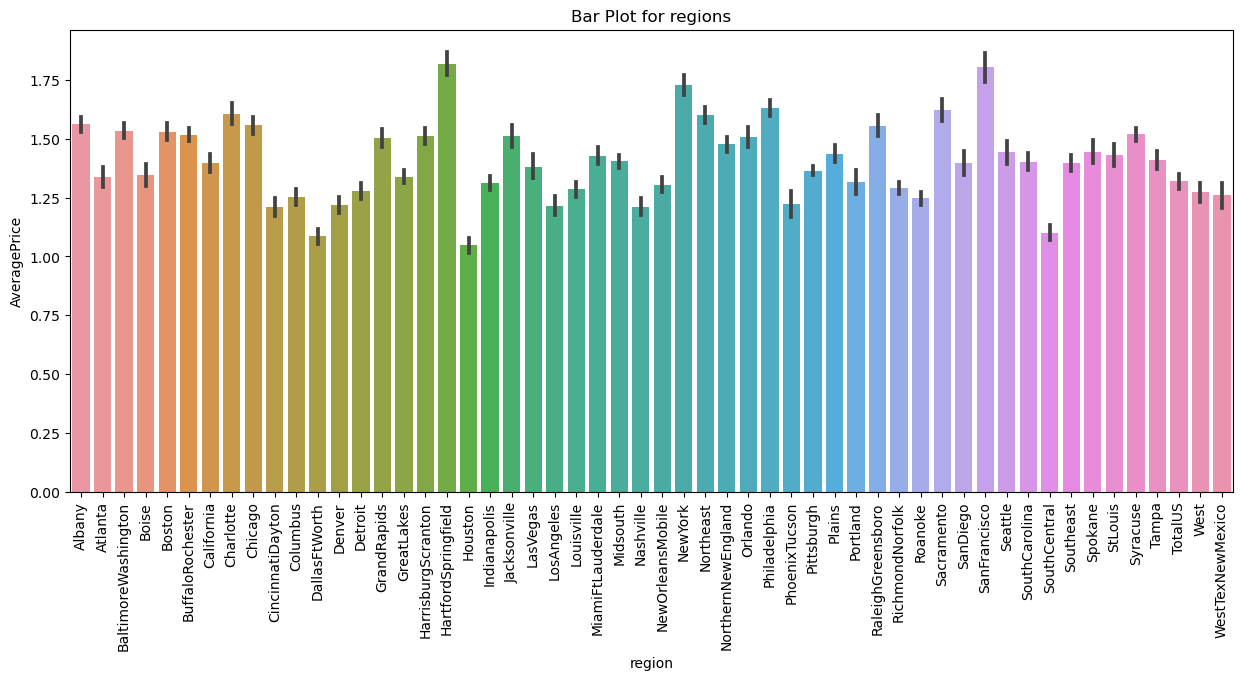

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(x=a_df['region'],y=a_df['AveragePrice'], data=a_df3)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

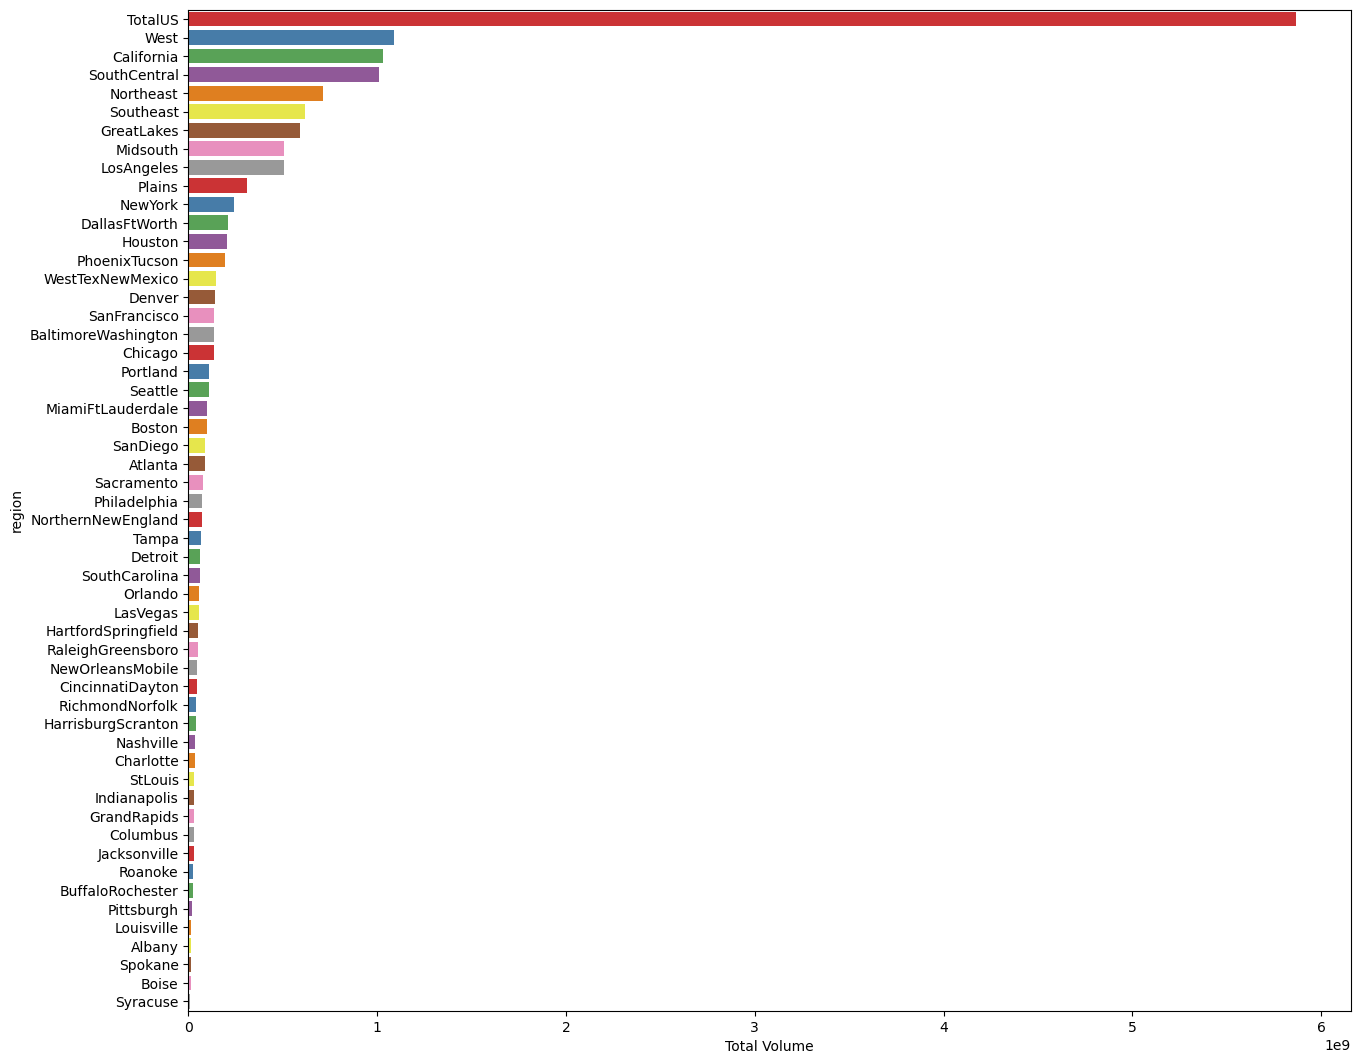

In [63]:
region = a_df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=a_df, palette="Set1")
plt.show()

In [65]:
a_df.groupby(['region'])[['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

- Maximum Salve Volume is in  South Central While Minimum Sales Volume is in Syracuse.
- Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

<Axes: xlabel='4046', ylabel='year'>

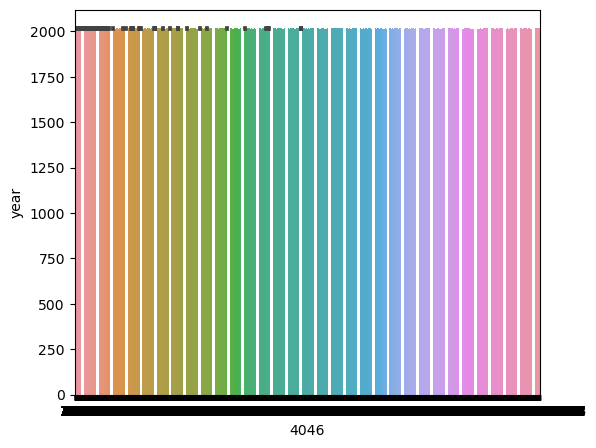

In [68]:
plot = plt.figure(figsize = (6,5))
sns.barplot(x = '4046', y = 'year', data = a_df)

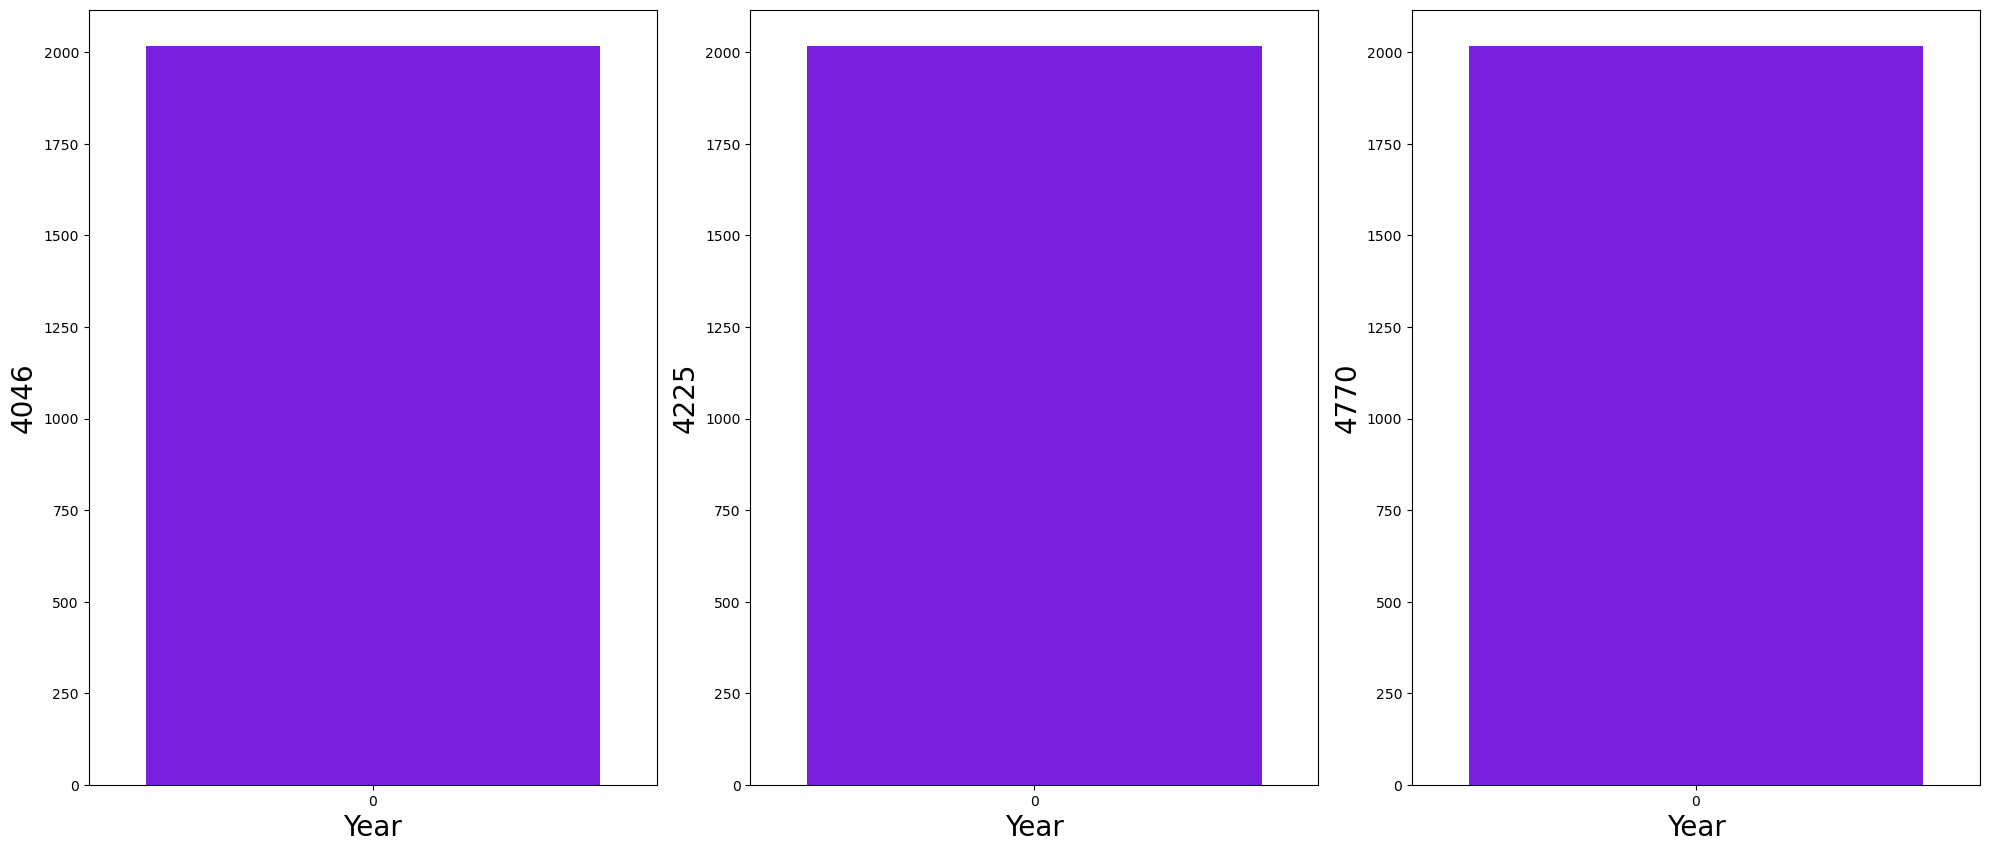

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = a_df[['4046','4225','4770']]
X = a_df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,)
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

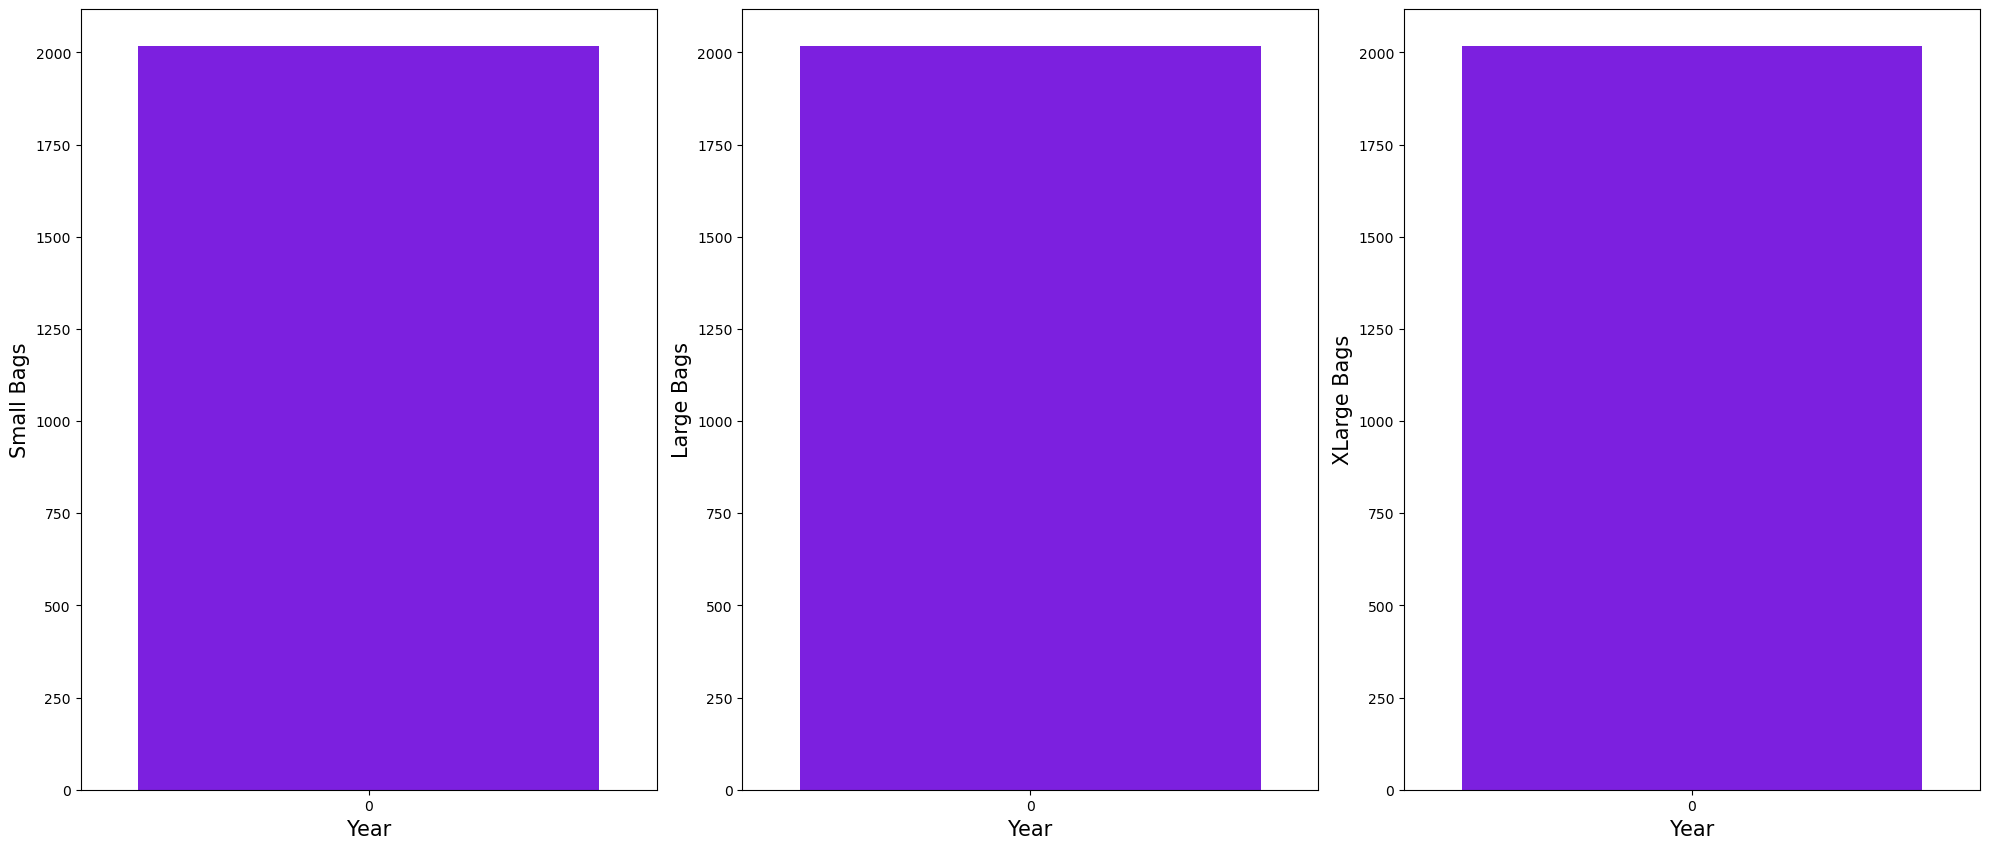

In [78]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y=a_df[['Small Bags','Large Bags','XLarge Bags']]
X=a_df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X)
        plt.xlabel('Year',fontsize=15)
        plt.ylabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

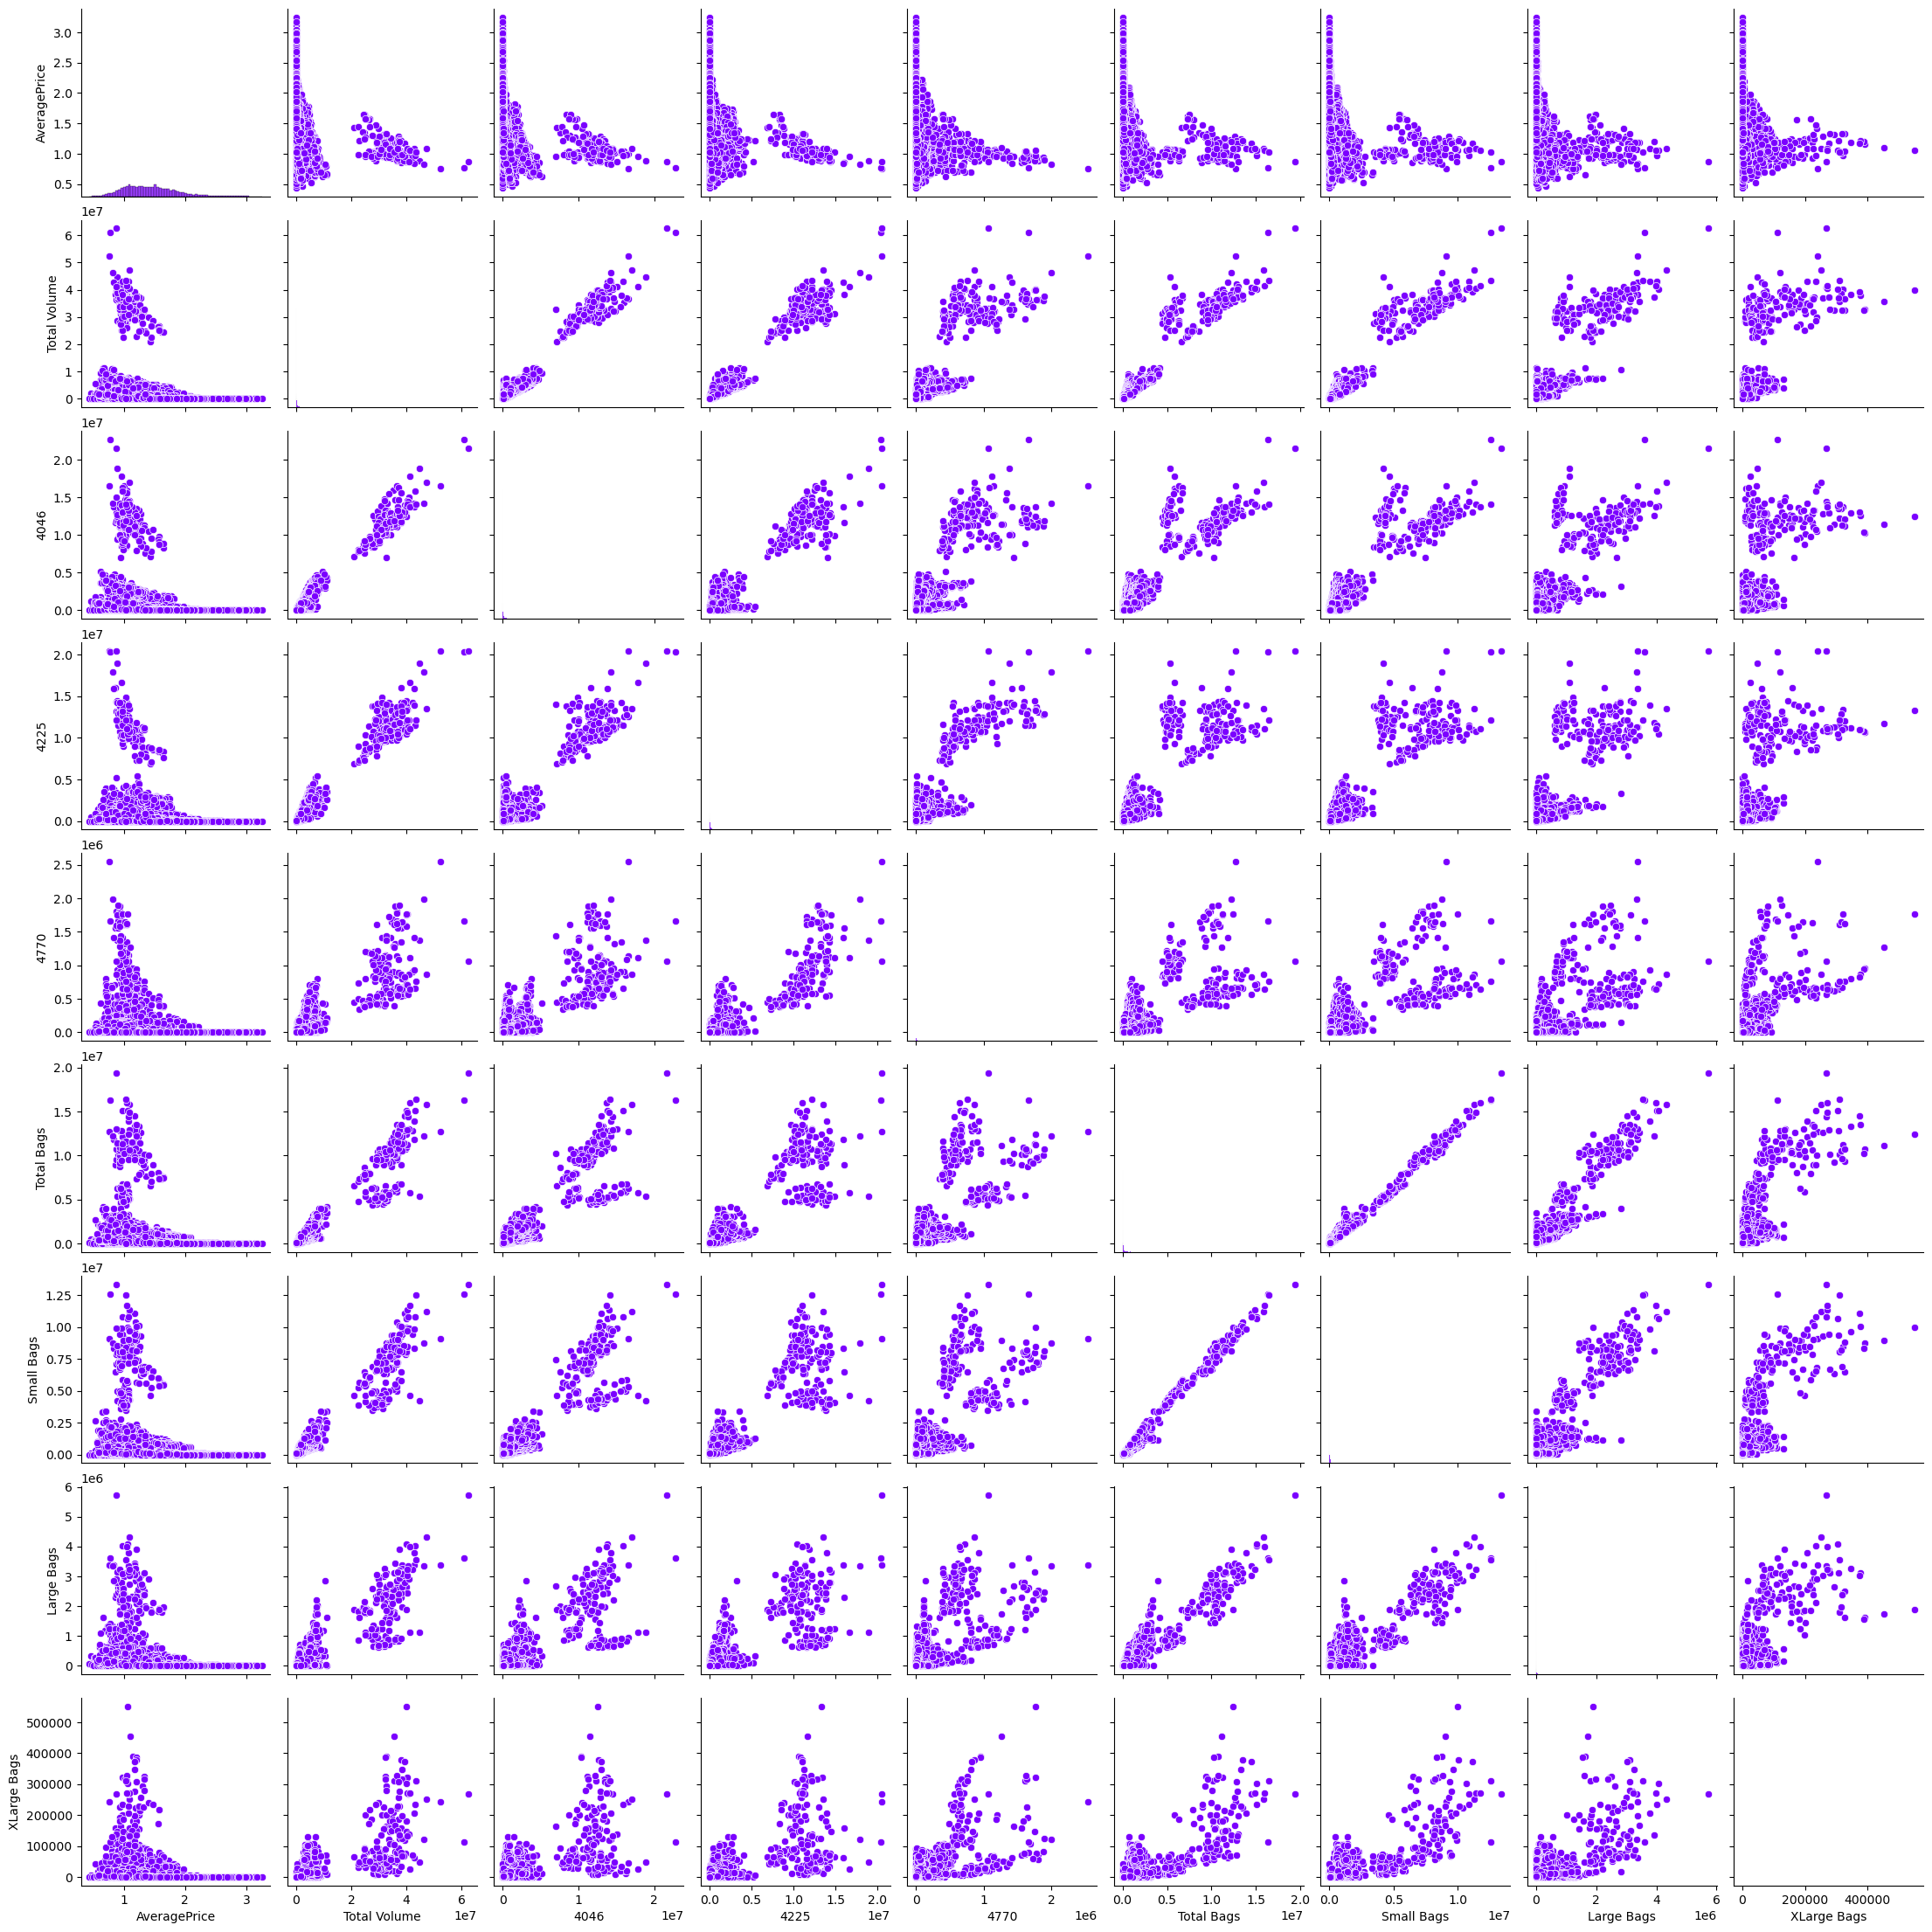

In [86]:
sns.pairplot(a_df2)

### Encoding Categorical Data

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a_df3['region']=le.fit_transform(a_df3['region'])
a_df3['type']=le.fit_transform(a_df3['type'])
a_df3.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0     8696.87     8603.62       93.25          0.0     0  2015       0   
1     9505.56     9408.07       97.49          0.0     0  2015       0   
2     8145.35     8042.21      103.14          0.0     0  2015       0   
3     5811.16     5677.40      133.76          0.0     0  2015       0   
4     6183.95     5986.26      197.69          0.0     0  2015       0   

                                                Year  \
0  <pandas.core.strings.accessor.StringMethods ob...   
1  <pandas.core.strings.accessor.StringMethods ob...   
2  <pandas.core.strings.accessor.StringMethods ob...   
3  <pandas.core.strings.accessor.StringMethods ob...   
4  <pandas.core.strings.accessor.StringMethods ob...   

                                               Month  
0  <pandas.core.strings.accessor.StringMethods ob...  
1  <pandas.core.strings.accessor.StringMethods ob...  
2  <pandas.core.strings.accessor.StringMethods ob...  
3  <pandas.core.strings.accessor.StringMethods ob...  
4  <pandas.core.strings.accessor.StringMethods ob...

### Outliers Detection and Removal

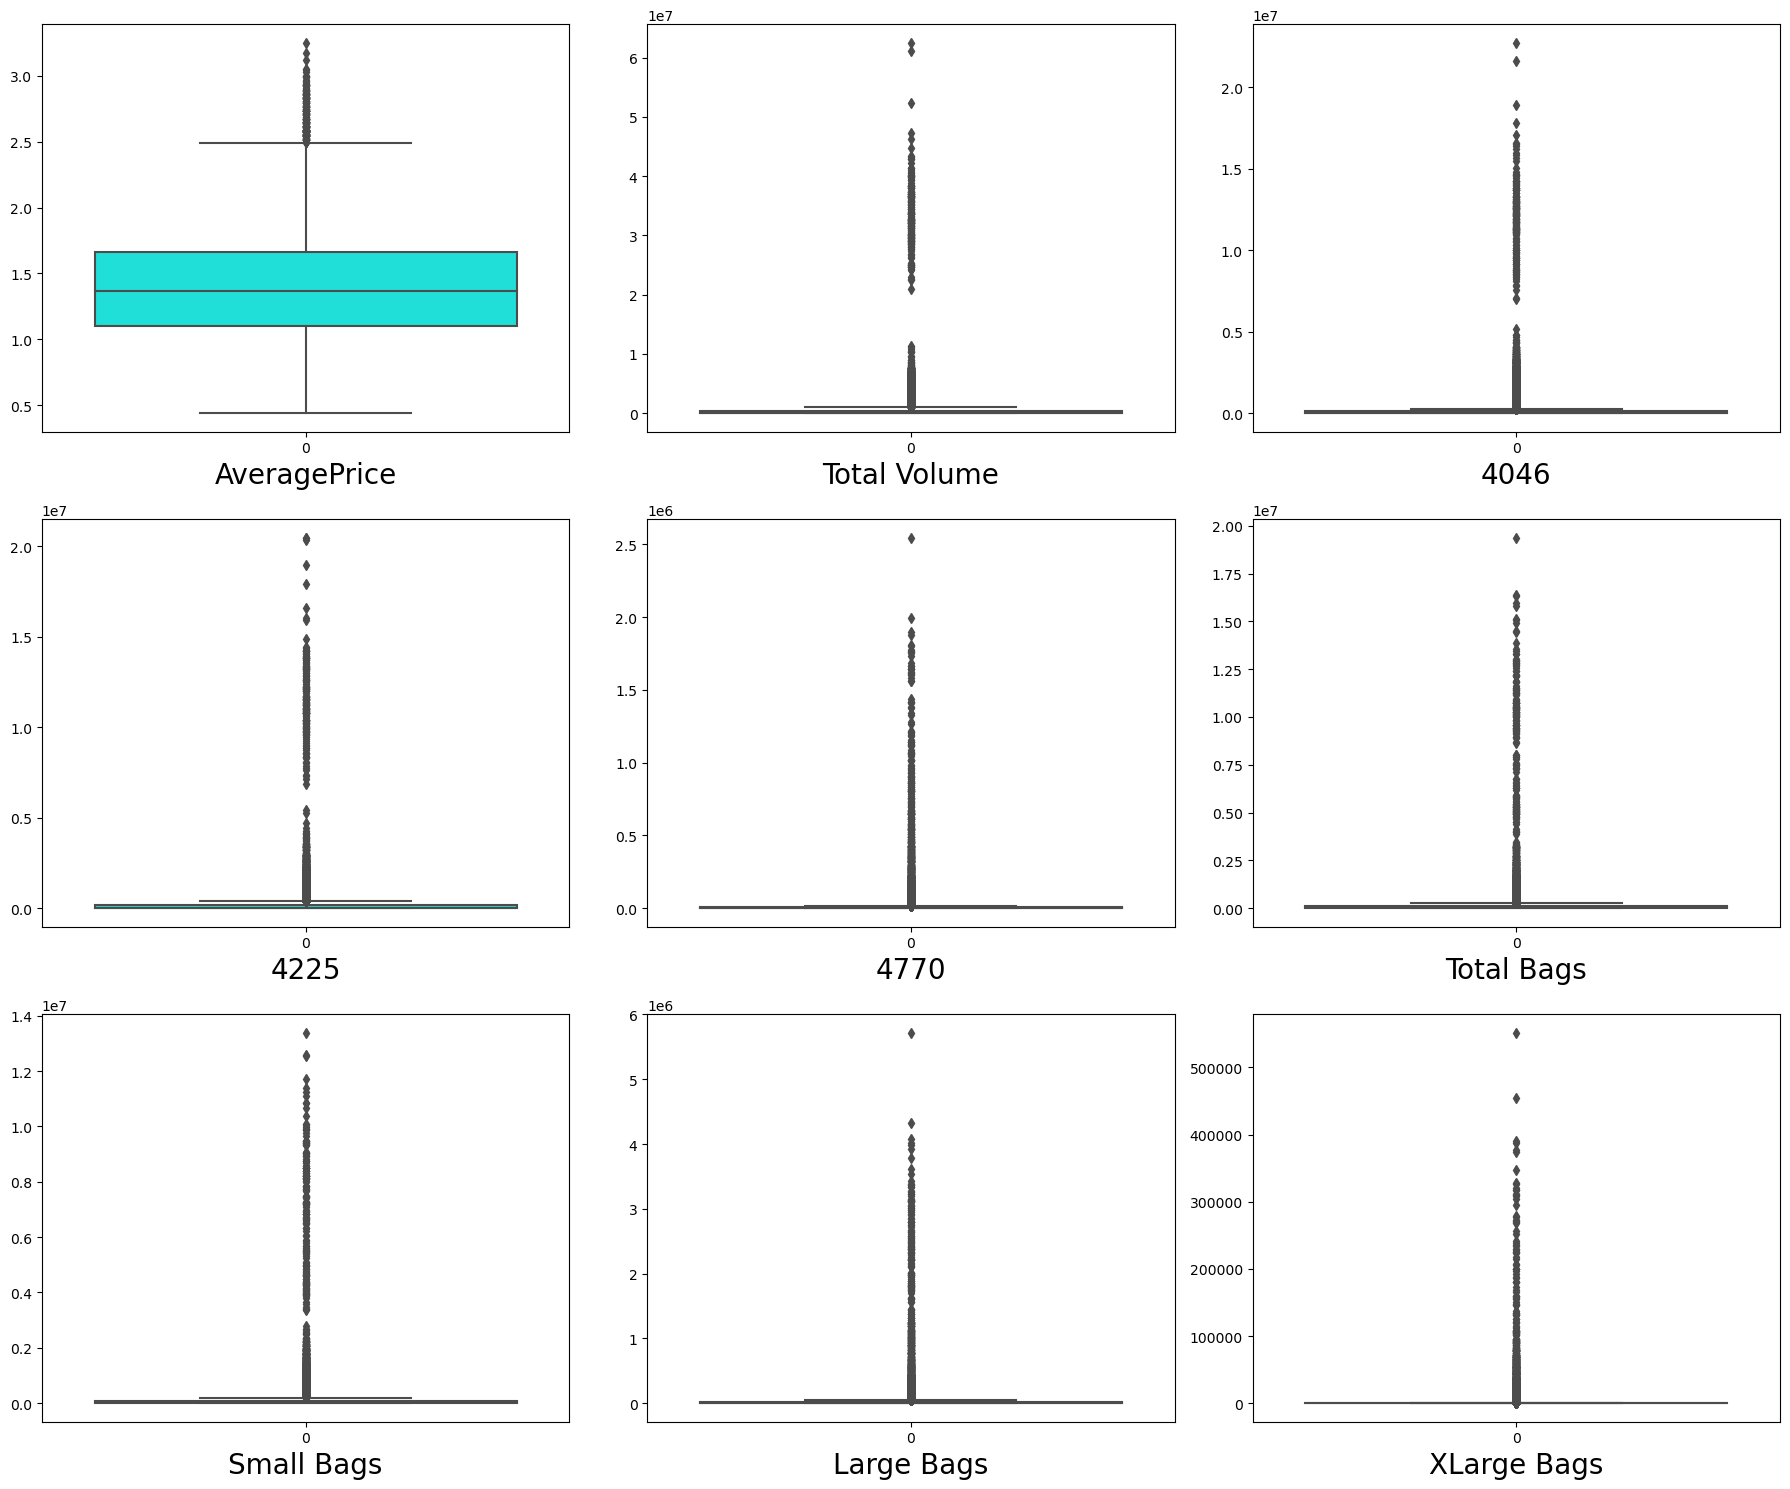

In [88]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in a_df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(a_df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [102]:
from scipy.stats import zscore
z = np.abs(zscore(a_df3))
threshold = 3
a_df4 = a_df3[(z<3).all(axis = 1)]

TypeError: unsupported operand type(s) for +: 'StringMethods' and 'StringMethods'

In [93]:
a_df.corr()

ValueError: could not convert string to float: '2015-12-27'

### Machine Learning Model Building

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor